In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

## Simulation setup

#### Simulation setup

In [2]:
dimensions = 3
sim = rw.Simulation()

start simulation


#### Source 

In [ ]:
nr_particles = 1*10**1
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1 #1/2**0.5 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc
phi = 0.0
pitch_angle = 2*np.pi * 54.74/360 # pitch angle for equal components in all directions
        

source = rw.PointSourceOriented(gyro_radius, source_pos, nr_particles, pitch_angle, phi)
sim.add_source(source)
sim.source.get_description()

#### Propagator

In [ ]:
nr_steps = 2*10**5
step_size = 0.5*10**10 # [m]
mfp = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12], dtype=np.float32)  # [m]
magnetic_field = rw.OrderedBackgroundField(10, [0,0,1]).magnetic_field

propagator = rw.AnisotropicPropagator(magnetic_field, mfp, nr_steps, step_size)
#propagator.set_pitch_angle_const(False)
sim.add_propagator(propagator)
sim.propagator.get_description()

#### Observer

In [ ]:
substeps = [False, False, True] # observe only steps (no substeps)
min_step = 1
max_step = nr_steps
nr_obs_steps = 200

observer = rw.TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)
sim.add_observer(observer)
sim.observer.get_description()

In [ ]:
%time sim.run_simulation()
sim.save_data('data/data_sim')

## Analyze statistics


init statistics plotting class


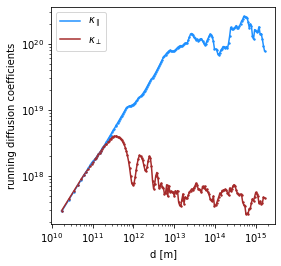

In [7]:
df = pd.read_pickle("data/data_sim.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = rw.Statistics(df_time_evolution_observer, dimensions)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)

/home/patrick/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


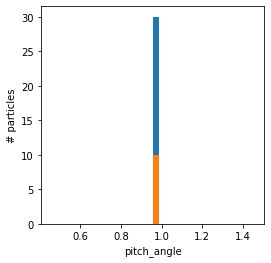

In [10]:
bins = 30
file_name = None
df_kappas = sta.plot_distribution('pitch_angle', -1, bins, file_name)

In [11]:
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,2.000000,NaN,NaN
1,0.0,1.0,8.660254e+09,2.811121e+09,3.030313e+09,2.886438e+09,0.050008,0.955393,-1.0,2.0
2,0.0,2.0,1.732051e+10,5.467253e+09,6.197358e+09,5.772877e+09,0.100016,0.955393,-1.0,2.0
3,0.0,3.0,2.598076e+10,7.961752e+09,9.493216e+09,8.659315e+09,0.150024,0.955393,-1.0,2.0
4,0.0,4.0,3.464101e+10,1.028838e+10,1.290965e+10,1.154575e+10,0.200032,0.955393,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
1685,9.0,147176.0,1.277571e+15,1.821897e+12,-2.243274e+12,8.249168e+12,-645.192383,0.955393,-1.0,2.0
1686,9.0,156486.0,1.360042e+15,1.262352e+12,-1.824686e+12,1.495783e+13,-706.977295,0.955393,-1.0,2.0
1687,9.0,166385.0,1.447731e+15,8.282044e+11,-1.640037e+12,3.239119e+13,-564.362122,0.955393,-1.0,2.0
1688,9.0,176910.0,1.540966e+15,9.543957e+11,-1.395794e+12,2.006644e+13,-491.417358,0.955393,-1.0,2.0


init trajectory plotting class


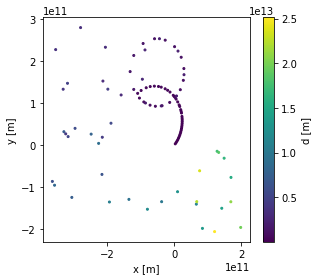

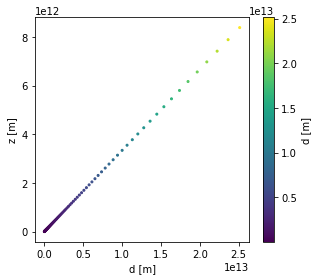

In [12]:
tra = Trajectory(df_time_evolution_observer, dimensions)
particle_ids = tra.get_particle_ids()
nr_steps = 100
tra.plot_trajectory('x', 'y', 'd', particle_ids[0], nr_steps, None)
tra.plot_trajectory('d', 'z', 'd', particle_ids[0], nr_steps, None)

TypeError: object of type 'float' has no len()